# 基于膜的细胞分割的种子分水岭方法
在本节中，我们将使用种子分水岭方法进行细胞分割。当给定基于膜标记物图像的细胞分割时，这种方法非常常见。因此，我们使用napari插件[napari-segment-blobs-and-things-with-membranes](https://github.com/haesleinhuepf/napari-segment-blobs-and-things-with-membranes)。在底层，这个插件使用了[scikit-image](http://scikit-image.org/)的函数。

另请参见
* [Robert Haase的讲座02a图像过滤和分割，分水岭解释在35:30](https://youtu.be/LT8L3vSLQ2Q?t=2124)

In [1]:
from napari_segment_blobs_and_things_with_membranes import voronoi_otsu_labeling, \
                                                           seeded_watershed, \
                                                           local_minima_seeded_watershed
from skimage.io import imread
from skimage.filters import gaussian
from skimage import data
from pyclesperanto_prototype import imshow

我们从scikit-image加载Cells3d示例图像，这是一个显示细胞核和膜的双通道图像。

In [2]:
cells = data.cells3d()
cells.shape

(60, 2, 256, 256)

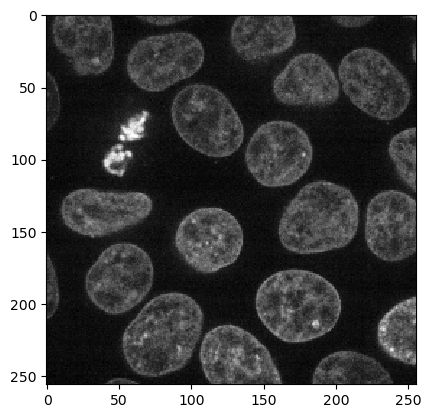

In [3]:
nuclei_channel = cells[30, 1]

imshow(nuclei_channel)

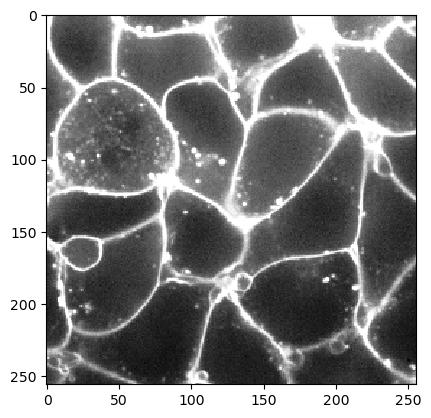

In [4]:
membrane_channel = cells[30, 0]

imshow(membrane_channel, max_display_intensity=6000)

## 用于细胞核分割的Voronoi-Otsu标记
首先，我们使用[Voronoi-Otsu-Labeling算法](image-segmentation:voronoi-otsu-labeling)开始细胞核分割。

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
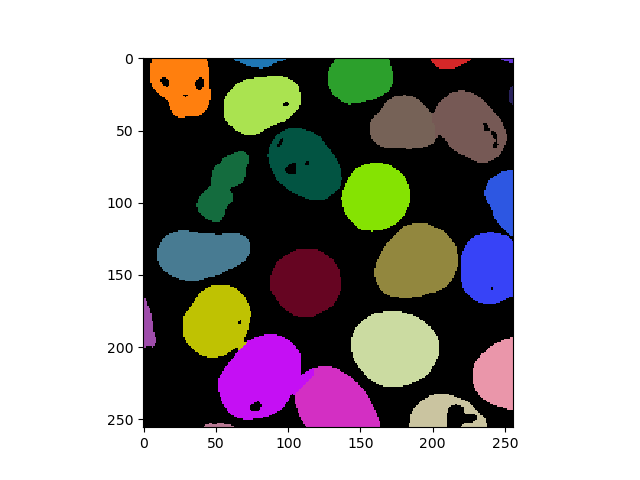

In [5]:
labeled_nuclei = voronoi_otsu_labeling(nuclei_channel, spot_sigma=10, outline_sigma=2)
labeled_nuclei

## 种子分水岭
我们可以使用标记的细胞核图像作为开始点，来淹没膜图像中的低强度区域。这让我们能够确定细胞分割。

StackViewNDArray([[ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  ...,
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25]])
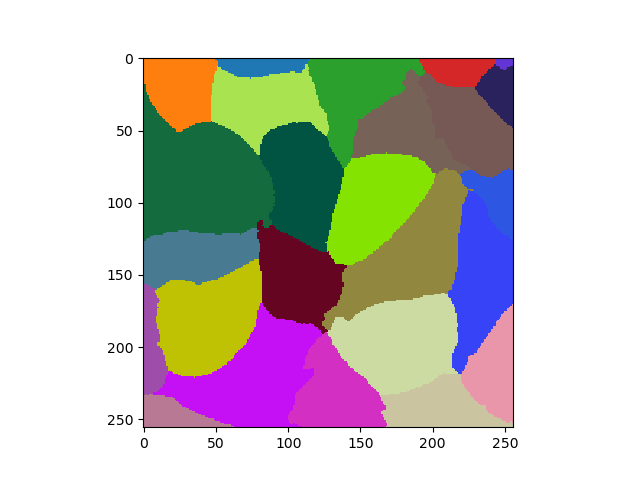

In [6]:
labeled_cells = seeded_watershed(membrane_channel, labeled_nuclei)
labeled_cells

如果细胞的轮廓不是100%准确，在分割细胞之前对膜图像进行一些模糊处理可能会有意义。

StackViewNDArray([[ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  ...,
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25]])
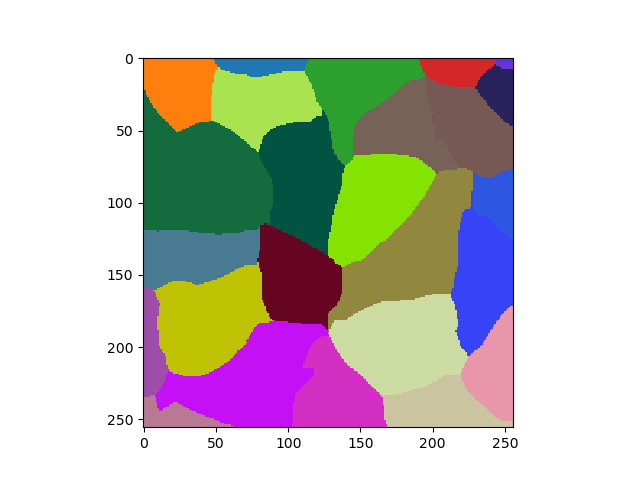

In [7]:
blurred = gaussian(membrane_channel, sigma=3)

labeled_cells = seeded_watershed(blurred, labeled_nuclei)
labeled_cells

## 使用自动种子检测的种子分水岭

如果我们没有对单独的细胞核通道进行成像，只有膜通道可用于分割，我们可以使用膜图像来搜索局部最小值（暗区）。

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27]])
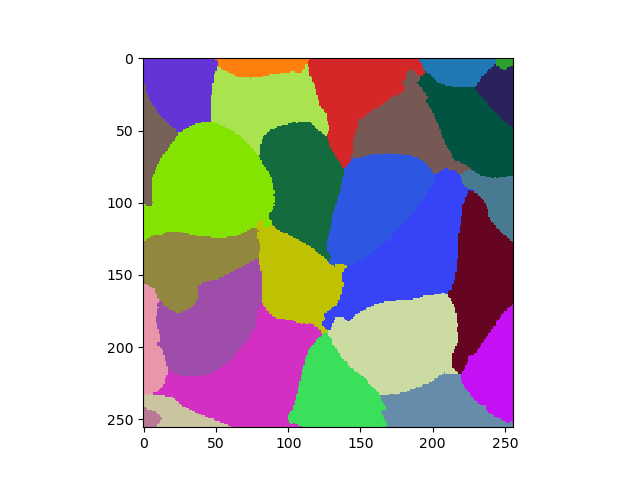

In [8]:
labeles_cells2 = local_minima_seeded_watershed(membrane_channel)
labeles_cells2

这个函数还有一些参数可以用来微调分割。参数`outline_sigma`允许控制高斯模糊滤波器，可以像上面所示微调分割细胞的轮廓。

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27]])
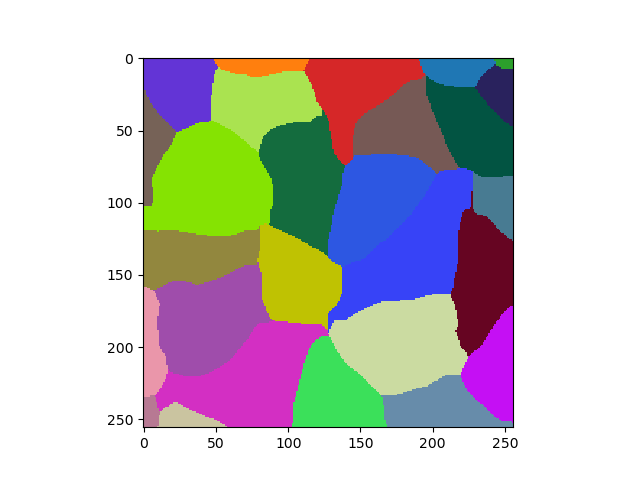

In [9]:
labeles_cells3 = local_minima_seeded_watershed(
                      membrane_channel, 
                      outline_sigma=3)
labeles_cells3

如果有多个细胞粘在一起，指定`spot_sigma`可能会有意义。这个参数允许配置细胞的接近程度/大小。

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [26, 26, 26, ..., 28, 28, 28],
                  [26, 26, 26, ..., 28, 28, 28],
                  [26, 26, 26, ..., 28, 28, 28]])
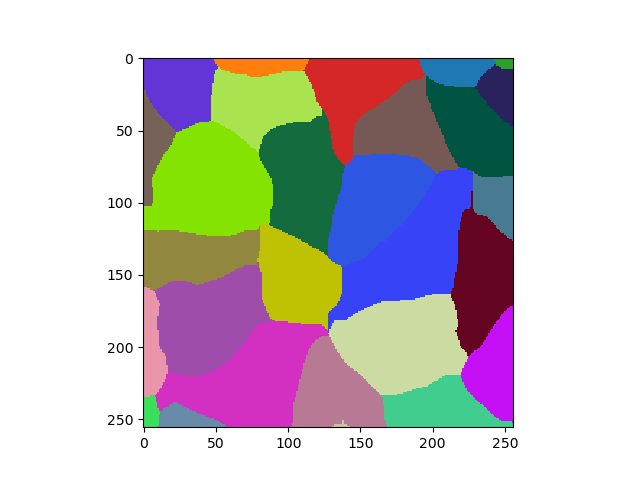

In [10]:
labeles_cells4 = local_minima_seeded_watershed(
                       membrane_channel, 
                       spot_sigma=9, 
                       outline_sigma=3)
labeles_cells4

## 练习
加载以下数据集，并找到使用种子分水岭方法处理它的好参数。这个示例图像数据是由德累斯顿MPI-CBG的Nadler实验室的Sascha M. Kuhn提供的。

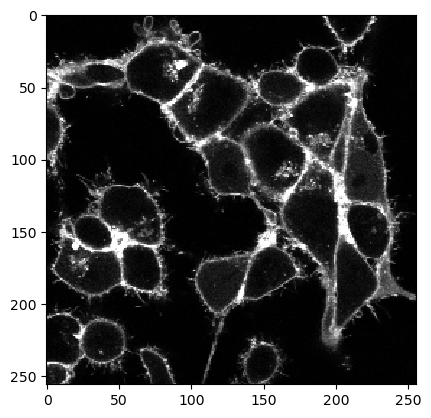

In [11]:
image_slice = imread("../../data/membrane_2d_timelapse.tif")[2]

imshow(image_slice)